### Scenario 2
---
Read in the Data and get summary stats.

In [305]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import *
%matplotlib inline

# data
data = Table.read_table('videodata.csv')
data_df = data.to_df()
data_df.describe()

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.242857,4.076923,21.967033,16.461538,12.153846,14.549451,0.582418,19.516484,0.758242,1.406593,10.373626,0.736264,5.604396,0.791209,3.252747
std,3.777040,10.098659,38.476097,33.896020,32.384126,34.670918,0.495893,1.846093,0.430521,10.354793,19.327958,0.443099,22.647482,0.408697,0.607242
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,0.000000,3.000000,3.000000,3.000000,0.000000,1.000000,1.000000,19.000000,1.000000,0.000000,5.000000,1.000000,0.000000,1.000000,3.000000
75%,1.250000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,14.500000,1.000000,0.000000,1.000000,4.000000
max,30.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000,33.000000,1.000000,99.000000,99.000000,1.000000,99.000000,1.000000,4.000000


Histogram for time played variable

Text(0.5,1,'Distribution of Hours Played Week Before Survey')

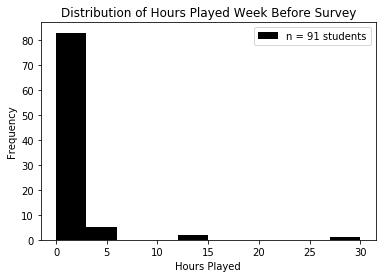

In [262]:
# plot histogram
plt.hist(data_df['time'], color='black')

# set axis and title
labels=['n = 91 students']
plt.legend(labels)
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Played Week Before Survey')

Now we want to look at the distribution for each different type of player. Students responded to the frequency question by listing how often they play:
1. Daily (coded as 1)
2. Weekly (coded as 2)
3. Monthly (coded as 3)
4. Semesterly (coded as 4)

If a question was not answered or improperly answered, then it was coded as 99. We cleaned the frequency variable for these responses

In [283]:
# Since we are working with frequency and time variables, clean variables for responses 99
cleaned_data_df = data_df[(data_df['time'] != 99) & (data_df['freq'] != 99)]
data_df_freq1 = cleaned_data_df[cleaned_data_df['freq'] == 1]
data_df_freq2 = cleaned_data_df[cleaned_data_df['freq'] == 2]
data_df_freq3 = cleaned_data_df[cleaned_data_df['freq'] == 3]
data_df_freq4 = cleaned_data_df[cleaned_data_df['freq'] == 4]

#### Daily Players

Text(0.5,1,'Distribution of Hours Played Week Before Survey (Daily Players)')

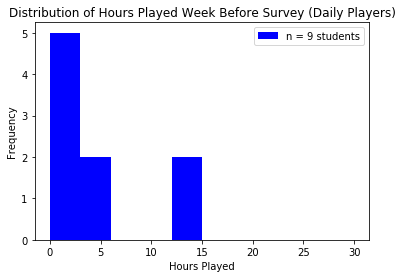

In [284]:
plt.hist(data_df_freq1['time'], range=[0,30], color='blue')
labels=['n = 9 students']
plt.legend(labels)
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Played Week Before Survey (Daily Players)')

#### Weekly Players

Text(0.5,1,'Distribution of Hours Played Week Before Survey (Weekly Players)')

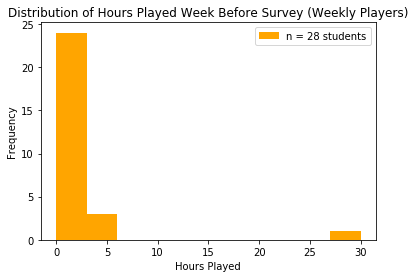

In [288]:
plt.hist(data_df_freq2['time'], range=[0,30], color='Orange')
labels=['n = 28 students']
plt.legend(labels)
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Played Week Before Survey (Weekly Players)')

#### Monthly Players

Text(0.5,1,'Distribution of Hours Played Week Before Survey (Monthly Players)')

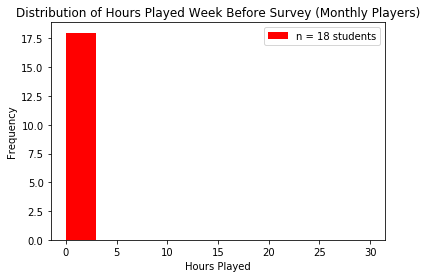

In [277]:
plt.hist(data_df_freq3['time'], range=[0,30], color='red')
labels=['n = 18 students']
plt.legend(labels)
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Played Week Before Survey (Monthly Players)')

#### Semesterly Players

Text(0.5,1,'Distribution of Hours Played Week Before Survey (Semesterly Players)')

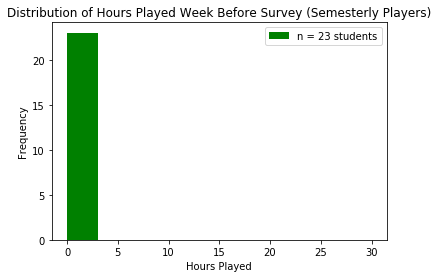

In [280]:
plt.hist(data_df_freq4['time'], range=[0,30], color='green')
labels=['n = 23 students']
plt.legend(labels)
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Played Week Before Survey (Semesterly Players)')

We see from the histograms as the frequency a player states they play goes up, hours played a week before the survey are recorded as being higher.


We can now look at the distributions overlayed

Text(0.5,1,'Distribution of Monthly & Semesterly Players')

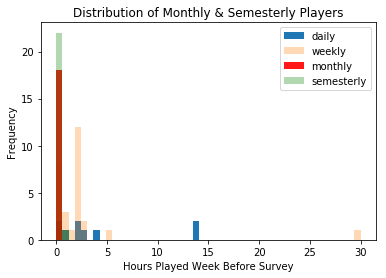

In [255]:
# create data bins to overlay plots on
bins = np.linspace(0, 30, 50)
bins2 = np.linspace(0, 30, 50)

# 1. distribution of time played before survey for players who responded they play frequently
# histograms
plt.hist(data_df_freq1['time'], bins, alpha=1, label='daily')
plt.hist(data_df_freq2['time'], bins, alpha=0.3, label='weekly')

# edit the legend, axis and title
plt.legend(loc='upper right')
plt.xlabel('Hours Played Week Before Survey')
plt.ylabel('Frequency')
plt.title('Distribution of Daily & Weekly Players')

# 2. distribution of time played before survey for players who responded they play less frequently
# histograms
plt.hist(data_df_freq3['time'], bins, alpha=0.9, label='monthly', color='red')
plt.hist(data_df_freq4['time'], bins, alpha=0.3, label='semesterly', color='green')

# edit the legend, axis and title
plt.legend(loc='upper right')
plt.xlabel('Hours Played Week Before Survey')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly & Semesterly Players')

Split now between daily/ weekly and monthly/ semesterly to get a better visual

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Distribution of Daily & Weekly Players')

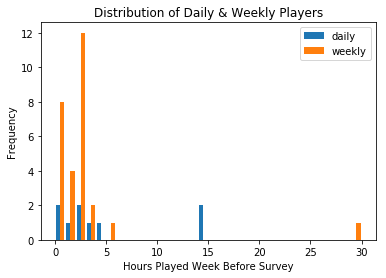

In [257]:
# another way (avoids overlaying bars)
plt.hist([data_df_freq1['time'], data_df_freq2['time']], label=['daily','weekly'], bins=30)
plt.legend(loc='upper right')
plt.xlabel('Hours Played Week Before Survey')
plt.ylabel('Frequency')
plt.title('Distribution of Daily & Weekly Players')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Distribution of Monthly & Semesterly Players')

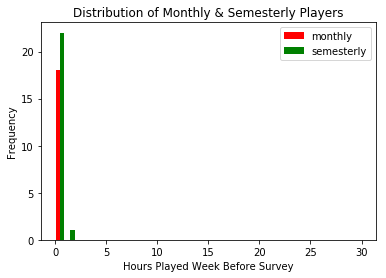

In [256]:
plt.hist([data_df_freq3['time'], data_df_freq4['time']], range=[0, 30], label=['monthly','semesterly'], bins=30, color=['red', 'green'])
plt.legend(loc='upper right')
plt.xlabel('Hours Played Week Before Survey')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly & Semesterly Players')